# Entropy in a binary image

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [31]:
def entropy(p):
    """Computes the entropy of a discrete random variable X that only takes two values, say 0 and 1.
    
    Args:
        p: 1D numpy array of floats between 0 and 1. The estimated probability of X taking value 1.
        
    Returns:
        H: numpy array of floats with same shape as p. The estimated entropy of X.
    """
    q = 1 - p
    H = []
    for x, y in zip(p, q):
        if x == 0:
            if y == 0:
                H.append(0.0)
            else:
                H.append(-y*np.log2(y))
        elif y == 0:
            if x == 0:
                H.append(0.0)
            else:
                H.append(-x*np.log2(x))
        else:
            H.append(-x*np.log2(x) - y*np.log2(y))
    return H

In [32]:
p_1 = np.linspace(0, 1, 1000)
H = entropy(p_1)

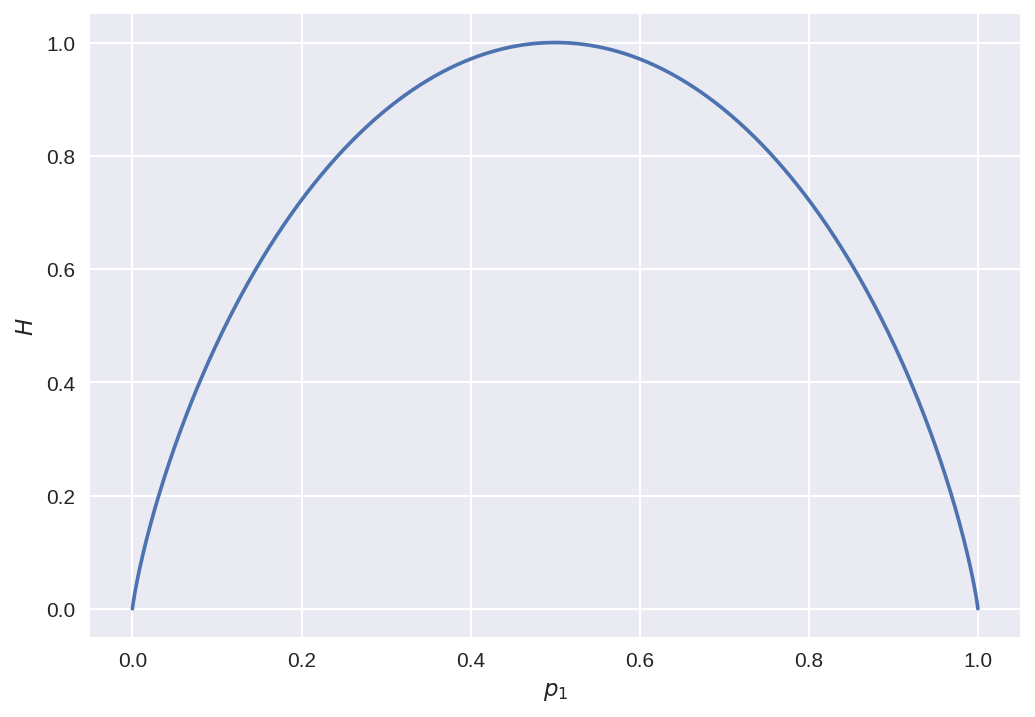

In [33]:
plt.figure(dpi=150)
plt.plot(p_1, H)
plt.xlabel(r'$p_1$')
plt.ylabel(r'$H$')
plt.savefig('entropy')
plt.show()

# Optimal codeword length

Example

$x$ | $p$($x$) | $c$($x$)
--- | -------- | ------
e   | 0.248    | 10
t   | 0.178    | 11
a   | 0.160    | 000
o   | 0.146    | 001
i   | 0.137    | 010
n   | 0.131    | 011

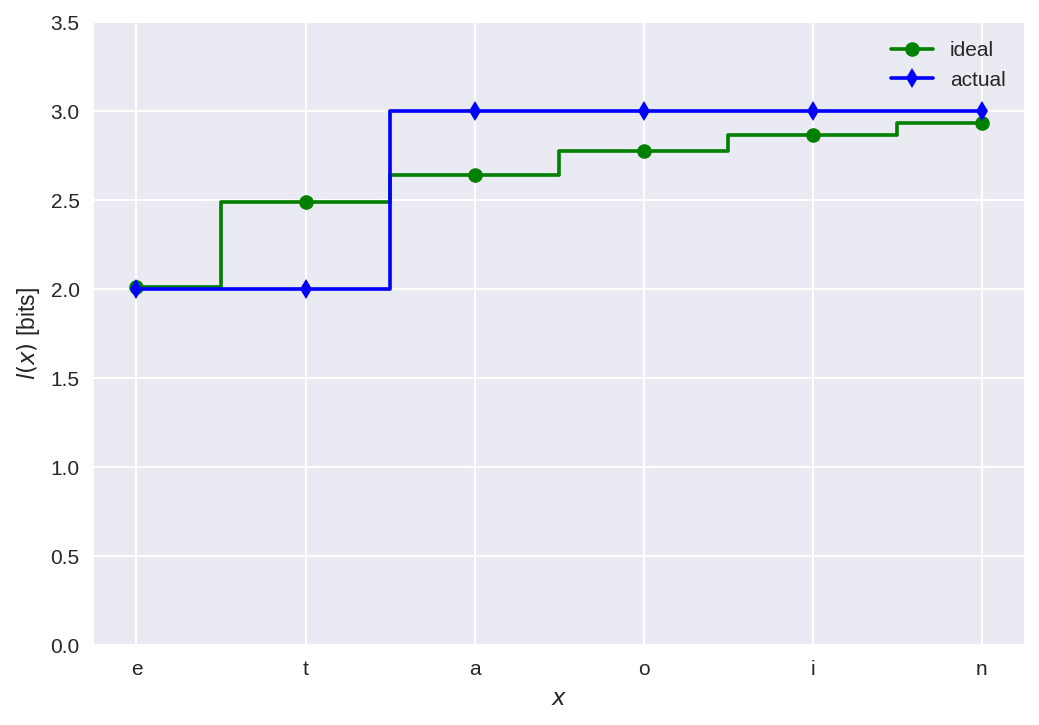

In [34]:
import numpy as np
symbols = ['e', 't', 'a', 'o', 'i', 'n']
prob = np.array([0.248, 0.178, 0.160, 0.146, 0.137, 0.131])
ideal_length = np.log2(1 / prob)
actual_length = np.array([2, 2, 3, 3, 3, 3])

plt.figure(dpi=150)
plt.step(ideal_length, 'g-o', where='mid', label='ideal')
plt.step(actual_length, 'b-d', where='mid', label='actual')
plt.xticks([0, 1, 2, 3, 4, 5], symbols)
plt.ylabel(r'$l(x)$ [bits]')
plt.xlabel(r'$x$')
plt.ylim((0, 3.5))
plt.legend()
plt.savefig('codeword_length.png')
plt.show()